In [1]:
from sympy import *
from sympy.vector import *
init_printing()

In [2]:
v_mid = 0.655
n_1 = 120
frac_l_bc_l_ab = 4.36
frac_l_bs2_l_bc = 0.275
d_4 = 0.99
p_max = 25.0
p_min = 0.5
g_2 = 6.0
g_3 = 18.0
l_bs3 = 0.16
j_s2 = 0.14
delta = Rational(1, 22)
j_o1_sht = 0.032
gd_sqr = 0.042
gd_sqr_1 = 0.006
j_red_pr = 0.20
phi_1 = 210
z_15 = 10
z_16 = 19
m = 4.0
beta = 25
k = 3
i_8_12 = 9.4
h = 0.016
alpha_dop = 24
delta_p = 330
frac_p_r_0 = 0.21

In [3]:
l_ab  = v_mid / (4 * n_1 / 60)
l_bc = frac_l_bc_l_ab * l_ab
phi = symbols('varphi', rational=True)
sys = CoordSys3D('oxyz')
point_a =  sys.origin
point_b = point_a.locate_new('b', -l_ab * cos(phi) * sys.i + l_ab * sin(phi) * sys.j)
x_c = symbols('x_c')
point_c = point_a.locate_new('c_1', x_c * sys.i)
s_1 = solve([(point_c.position_wrt(point_b)).magnitude() - l_bc],[x_c])
point_c = point_a.locate_new('c', s_1[0][0] * sys.i)
l_bs_2 = frac_l_bs2_l_bc * l_bc
x_s2, y_s2 = symbols('x_s2, y_s2')
pbx, pby, pcx, pcy = symbols('pbx, pby, pcx, pcy')
pbb = point_a.locate_new('pbb', pbx * sys.i + pby * sys.j)
point_s2 = point_a.locate_new('s_2_1', x_s2 * sys.i + y_s2 * sys.j)
s1 = solve([(point_s2.position_wrt(pbb)).magnitude() - l_bs_2, 
           (pbx - x_s2) / (pbx - pcx) - (pby - y_s2) / (pby - pcy)],[x_s2, y_s2])
point_s2 = point_a.locate_new('s_2', s1[0][0].subs({pbx: point_b.express_coordinates(sys)[0], 
                                                   pby: point_b.express_coordinates(sys)[1],
                                                   pcx: point_c.express_coordinates(sys)[0],
                                                   pcy: point_c.express_coordinates(sys)[1]}) * sys.i + s1[0][1].subs({pbx: point_b.express_coordinates(sys)[0], 
                                                   pby: point_b.express_coordinates(sys)[1],
                                                   pcx: point_c.express_coordinates(sys)[0],
                                                   pcy: point_c.express_coordinates(sys)[1]}) * sys.j)
point_s3 = point_c.locate_new('s_3', -l_bs3 * sys.i)
vec_ab = point_b.position_wrt(point_a)
vec_ac = point_c.position_wrt(point_a)
vec_as2 = point_s2.position_wrt(point_a)
vec_as3 = point_s3.position_wrt(point_a)
phi_2 = acos(l_ab * sin(phi) / l_bc)
omega_mid_1 = 2 * pi * n_1 / 60
f_min = (0.049 * 10 ** 6 * pi * d_4 ** 2 / 4).n()
f_max = (2.451 * 10 ** 6 * pi * d_4 ** 2 / 4).n()

In [4]:
omega_q2 = diff(phi_2, phi)
v_qb = simplify(diff(vec_ab, phi).magnitude())
v_qc = diff(vec_ac, phi).to_matrix(sys)[0]
v_qs2 = diff(vec_as2, phi)
v_qs3 = diff(vec_as3, phi)
m_c_pr = Integral(-1 * f_min * v_qc, (phi, 0, pi)).doit() + Integral(f_max * v_qc, (phi, pi, 2 * pi)).doit()
m_d_pr = - m_c_pr / (2 * pi).n(3)
m_g2_pr = simplify(v_qs2.magnitude() * g_2)
j_pr2 = j_s2 * omega_q2 ** 2 + g_2 * v_qs2.magnitude() ** 2
j_pr3 = g_3 * abs(v_qc) ** 2
j_pr2gr = j_pr2 + j_pr3
a1 = integrate(v_qc, phi)
c1, c2 = symbols('c_1, c_2')
t1 = solve([-1 * a1.subs(phi,0) * f_min + c1, a1.subs(phi, pi) * f_max - a1.subs(phi, pi) * f_min - 4000 + c2], [c1, c2])
a1 = integrate(v_qc, phi)
a2 = (Integral(m_d_pr, phi)).doit()
a_phi = (-1 * a1 * f_min + t1[c1] + a2, a1 * f_max + t1[c2] + a2)
t_2 = j_pr2gr * omega_mid_1 ** 2 / 2
arr_phi = [(i / 360 * 2 * pi).n(3) for i in range(0, 360, 5)]
delta_t_1 = [(a_phi[0].subs(phi, i) - t_2.subs(phi, i)).n(3) if i < pi else (a_phi[1].subs(phi, i) - t_2.subs(phi, i)).n(3) for i in arr_phi]
t_max = max(delta_t_1)
t_min = min(delta_t_1)
phi_10, phi_20 = arr_phi[delta_t_1.index(t_max)], arr_phi[delta_t_1.index(t_min)]
delta_t = t_max - t_min
j_pr1 = (delta_t - delta * (t_2.subs(phi, phi_10).n(3) - t_2.subs(phi, phi_20))) / (omega_mid_1 ** 2 * delta)


In [5]:
omega = [(i - (t_max + t_min) / 2) / (omega_mid_1 * j_pr1.n(4)) + omega_mid_1 for i in delta_t_1]
omega_at_pos = omega[phi_1 // 5]
omega_at_pos.n(3)

In [6]:
m_sum_pr = (v_qc * f_min * -1 + m_d_pr, f_max * v_qc + m_d_pr)
epsilon_q2 = diff(phi_2, phi)
a_qs2 = diff(v_qs2, phi)

epsilon = lambda i: (m_sum_pr[1].subs(phi, i) / (j_pr2 + j_pr1).subs(phi, i)- omega_at_pos ** 2 / (2 * j_pr2.subs(phi, i) + j_pr1) * diff(j_pr2, phi).subs(phi, i)).n(3)

In [7]:
epsilon_isk = epsilon((phi_1 / 360 * 2 * pi).n(3))
epsilon_isk.n(3)

Начало расчёта

In [8]:
omega_at_pos = omega_at_pos * -1
epsilon_isk = epsilon_isk * -1

In [9]:
vec_ab = point_b.position_wrt(point_a).subs(phi, (phi_1 / 360 * 2 * pi).n(3))
vec_bc = point_c.position_wrt(point_b).subs(phi, (phi_1 / 360 * 2 * pi).n(3))
vec_bs2 = point_s2.position_wrt(point_b).subs(phi, (phi_1 / 360 * 2 * pi).n(3))

In [10]:
aaa = point_b.express_coordinates(sys)

In [11]:
aaa1 = point_a.express_coordinates(sys)

In [12]:
aaa[0].subs(phi, phi_1 / 360 * 2 * pi).n(3) * 400

In [13]:
l_bs_2 * 400

In [14]:
def solve_vec_equation(eq, var, sys):
	x_eq, y_eq, z_eq = [], [], []
	for i in eq:
		x_eq.append(i.to_matrix(sys)[0])
		y_eq.append(i.to_matrix(sys)[1])
		if i.to_matrix(sys)[2] != 0: z_eq.append(i.to_matrix(sys)[2])
	s = x_eq + y_eq + z_eq
	print('%' , s, 'This is S')
	return solve(s, var)

In [15]:
vec_bs2

In [16]:
omega_1, omega_2, epsilon_1, epsilon_2 = symbols('omega_1, omega_2, varepsilon_1, varepsilon_2')
vec_omega_1 = -omega_at_pos.n(3) * sys.k
vec_omega_2 = omega_2 * sys.k
vec_epsilon_1 = epsilon_isk * sys.k
vec_epsilon_2 = epsilon_2 * sys.k
vec_v_b = vec_omega_1.cross(vec_ab)
vec_v_c = x_c * sys.i
s1 = solve_vec_equation([vec_v_c - vec_v_b - vec_omega_2.cross(vec_bc)], [x_c, omega_2], sys)
s1

% [0.0409275054931641*omega_2 + x_c - 0.525902458280325, 0.354621051291371*omega_2 - 0.911178984493017] This is S


In [17]:
vec_v_c = s1[x_c] * sys.i
a_b = vec_epsilon_1.cross(vec_ab) + vec_omega_1.cross(vec_v_b)
a_c = x_c * sys.i
vec_omega_2 = s1[omega_2] * sys.k
s1 = solve_vec_equation([a_c - a_b - vec_epsilon_2.cross(vec_bc) - vec_omega_2.cross(vec_v_c)], [x_c, epsilon_2], sys)
s1

% [0.0409275054931641*varepsilon_2 + x_c + 11.6880426001168, 0.354621051291371*varepsilon_2 - 7.8738006185313] This is S


In [18]:
a_b.magnitude()

In [19]:
vec_epsilon_2 = s1[epsilon_2] * sys.k
a_c = s1[x_c] * sys.i

In [20]:
a_c

In [21]:
v_s2 = vec_v_b + vec_omega_2.cross(vec_bs2)
a_s2 = a_b + vec_epsilon_2.cross(vec_bs2) + vec_omega_2.cross(v_s2)
print(latex(a_s2.magnitude()))

14.8588101987311


In [22]:
vec_s2b = point_b.position_wrt(point_s2)
vec_s2c = point_c.position_wrt(point_s2)

x_a, y_a, x_b, y_b, x_c, y_c, m_1, f_dop = symbols('x_a, y_a, x_b, y_b, x_c, y_c, m_1, f_dop')
f_a = x_a * sys.i + y_a * sys.j
f_b = x_b * sys.i + y_b * sys.j
f_c = x_c * sys.i + y_c * sys.j
m_1_isk = (m_1) * sys.k
eq_1_f = (f_a + f_b - 10 * 9.8 * sys.j).subs({omega_1: omega_at_pos.n(3), epsilon_1: epsilon_isk.n(3), phi:(phi_1 / 360 * 2 * pi).n(3)})
eq_1_m = (vec_ab.cross(f_b) + m_1_isk + j_pr1 * vec_epsilon_1).subs({omega_1: omega_at_pos.n(3), epsilon_1: epsilon_isk.n(3), phi:(phi_1 / 360 * 2 * pi).n(3)})
eq_2_f = (-f_b + f_c - g_2 * 9.8 * sys.j - g_2 * a_s2).subs({omega_1: omega_at_pos.n(3), epsilon_1: epsilon_isk.n(3), phi:(phi_1 / 360 * 2 * pi).n(3)})
eq_2_m = (vec_s2c.cross(f_c) + vec_s2b.cross(-f_b) - j_s2 * vec_epsilon_2).subs({omega_1: omega_at_pos.n(3), epsilon_1: epsilon_isk.n(3), phi:(phi_1 / 360 * 2 * pi).n(3)})
eq_3_f = (-f_c + (f_max) * sys.i - g_3 * a_c + f_dop * sys.j).subs({omega_1: omega_at_pos.n(3), epsilon_1: epsilon_isk.n(3), phi:(phi_1 / 360 * 2 * pi).n(3)})
s1 = solve_vec_equation([eq_1_f, eq_1_m, eq_2_f, eq_2_m, eq_3_f], [x_a, y_a, x_b, y_b, x_c, y_c, m_1, f_dop], sys)

% [x_a + x_b, 0, -x_b + x_c + 81.811984187073, 0, -x_c + 1886929.92352573, y_a + y_b - 98.0, 0, -y_b + y_c - 94.2264294300614, 0, f_dop - y_c, m_1 + 0.0409275054931641*x_b + 0.0709110260009766*y_b + 0.68*(0.0151685411623442*pi**2 + 1.69e+5)/pi**2, -0.0112550604154246*x_b - 0.0296724450777394*x_c - 0.0975207579541448*y_b - 0.257100293337226*y_c - 3.10847898786658] This is S


In [23]:
s1

In [24]:
(s1[x_c] ** 2 + s1[y_c] ** 2) ** .5, (s1[x_b] ** 2 + s1[y_b] ** 2) ** .5

In [25]:
omega_1 = omega_at_pos.n(3)
epsilon_1 = epsilon_isk.n(3)
l_1 = l_ab
l_2 = l_bc


In [26]:
182.498 / 200

In [27]:
vec_bc.magnitude().n(3)

In [28]:
vec_v_c = x_c * sys.i
vec_omega_2 = omega_2 * sys.k
vec_v_cb = vec_omega_2.cross(vec_bc)
solve_vec_equation([vec_v_c - vec_v_b - vec_v_cb], [x_c, omega_2], sys)

% [0.0409275054931641*omega_2 + x_c - 0.525902458280325, 0.354621051291371*omega_2 - 0.911178984493017] This is S


In [29]:
omega_1 = omega_at_pos.n(3)
epsilon_1 = epsilon_isk.n(3)

In [30]:
omega_1 ** 2 * l_ab * 20

In [31]:
vec_epsilon_2.cross(vec_bc).magnitude().n(3) * 20

In [32]:
a_s2.magnitude() * 20, a_b.magnitude() * 20, a_c.magnitude() * 20

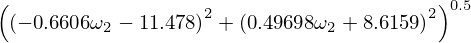

In [33]:
vec_epsilon_2 = 18.695 * sys.k
(a_b + vec_epsilon_2.cross(-vec_bs2) + vec_omega_2.cross(v_s2)).magnitude().n(5)

In [34]:
68 * 0.0001

In [35]:
(2.617 + 103 / 400 * 58.68 + 73.128 * 36.52 / 400)/l_bc

In [36]:
300 / 50153